# AP Challenge 1
## Install libraries

In [1]:
#Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Path whereever the data file is stored
filepath = '/Users/marcusleiwe/Documents/GitHubRepos/AlixPartnersChallenge'
os.chdir(filepath)

#Now load in the dataset and split into test and train
FullData = pd.read_csv('data.csv')
display(FullData.head())
TrainData = FullData[FullData['train']==1]
TestData = FullData[FullData['train']!=1]

,id,train,target_eval,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_291,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300
0,1,1,1,0.422,0.521,0.493,0.206,0.144,0.203,0.709,...,0.188,0.143,0.432,0.872,0.282,0.152,0.878,0.750,0.670,0.358
1,2,1,0,0.345,0.974,0.330,0.643,0.931,0.664,0.146,...,0.164,0.676,0.647,0.437,0.853,0.908,0.141,0.705,0.974,0.240
2,3,1,1,0.590,0.135,0.046,0.852,0.655,0.765,0.261,...,0.147,0.822,0.769,0.743,0.293,0.806,0.610,0.172,0.825,0.330
3,4,1,1,0.226,0.952,0.773,0.070,0.800,0.320,0.081,...,0.155,0.240,0.553,0.102,0.092,0.016,0.785,0.320,0.548,0.888
4,5,1,0,0.250,0.698,0.781,0.060,0.427,0.096,0.176,...,0.699,0.765,0.946,0.112,0.744,0.181,0.861,0.383,0.570,0.777


## EDA
### Part 1 Checking for variable distribution and class splitting

In [3]:
AllCols = TrainData.columns
VarCols = AllCols[3:]
display(TrainData.head())
print('Any missing values?')
missing = TrainData.isnull().sum()
missing = missing[missing > 0]
display(missing)
print('Group Stats')
display(TrainData.groupby('target_eval')[VarCols[:5]].agg([np.mean,np.std,np.min,np.max]))

,id,train,target_eval,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_291,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300
0,1,1,1,0.422,0.521,0.493,0.206,0.144,0.203,0.709,...,0.188,0.143,0.432,0.872,0.282,0.152,0.878,0.750,0.670,0.358
1,2,1,0,0.345,0.974,0.330,0.643,0.931,0.664,0.146,...,0.164,0.676,0.647,0.437,0.853,0.908,0.141,0.705,0.974,0.240
2,3,1,1,0.590,0.135,0.046,0.852,0.655,0.765,0.261,...,0.147,0.822,0.769,0.743,0.293,0.806,0.610,0.172,0.825,0.330
3,4,1,1,0.226,0.952,0.773,0.070,0.800,0.320,0.081,...,0.155,0.240,0.553,0.102,0.092,0.016,0.785,0.320,0.548,0.888
4,5,1,0,0.250,0.698,0.781,0.060,0.427,0.096,0.176,...,0.699,0.765,0.946,0.112,0.744,0.181,0.861,0.383,0.570,0.777


Any missing values?


Series([], dtype: int64)

Group Stats


var_1                             var_2                   \
                 mean       std   amin   amax      mean       std   amin   
target_eval                                                                
0            0.435901  0.292772  0.000  0.990  0.498702  0.294203  0.000   
1            0.511908  0.283801  0.003  0.999  0.483580  0.302474  0.006   

                       var_3                             var_4            \
              amax      mean       std   amin   amax      mean       std   
target_eval                                                                
0            0.981  0.535466  0.286207  0.003  0.995  0.555702  0.279168   
1            0.999  0.504521  0.296460  0.003  0.993  0.479227  0.307112   

                              var_5                          
              amin   amax      mean       std   amin   amax  
target_eval                                                  
0            0.011  0.996  0.505710  0.280411  0.019  0.966  
1            0.002  0.998  0.509218  0.265057  0.001  0.979

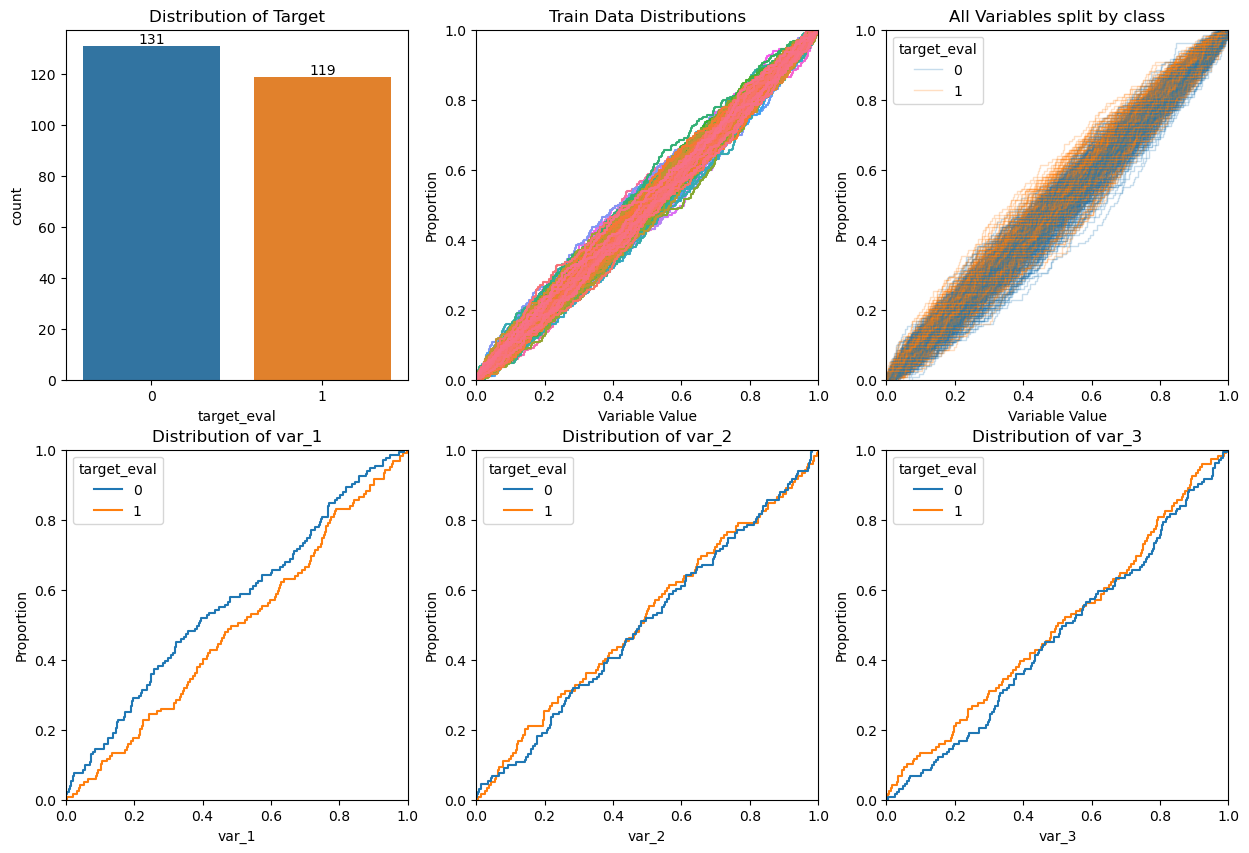

In [4]:


fig, ax = plt.subplots(2, 3, figsize=(15,10))
# Are the classifications evenly distributed
class_ax = sns.countplot(data=TrainData, x='target_eval', ax=ax[0,0])
class_ax.bar_label(class_ax.containers[0])
class_ax.title.set_text('Distribution of Target')

#Types of distributions
ecdf_ax = sns.ecdfplot(data=TrainData.filter(like='var_', axis="columns"), ax=ax[0,1], legend=False)
ecdf_ax.set_xlabel('Variable Value')
ecdf_ax.set_xlim(0,1)
ecdf_ax.title.set_text('Train Data Distributions')

#Split the values according to the classification
for col in VarCols:
    many_ax = sns.ecdfplot(data=TrainData, x=col, hue='target_eval', alpha=0.25, linewidth=1, ax=ax[0,2])
many_ax.set_xlabel('Variable Value')
many_ax.set_xlim(0,1)
many_ax.title.set_text('All Variables split by class')

#Plotting three examples
for c in range(3):
    col = VarCols[c]
    ax_t = sns.ecdfplot(data=TrainData, x=col, hue='target_eval', ax=ax[1,c])
    ax_t.set_xlabel(str(col))
    ax_t.set_xlim(0,1)
    ax_t.title.set_text('Distribution of '+str(col))

So there are roughly the same number of data points which are 0 or 1. Interestingly looking at the distributions here, we don't have gaussians but instead what looks like it could be some sort of poisson distribution. 

Thankfully there does seem to be a rough difference between the classes very roughly, class 1 has more lower values for each variable and class 0 has higher values. The important thing here though is that there does seem to be a difference we can parse out. See the three example variables: var_1 looks like a significant difference  

### Part 2 Looking for correlations
Just checking to see if the values correlate with each other. This might help us to see if we can reduce some dimensionality

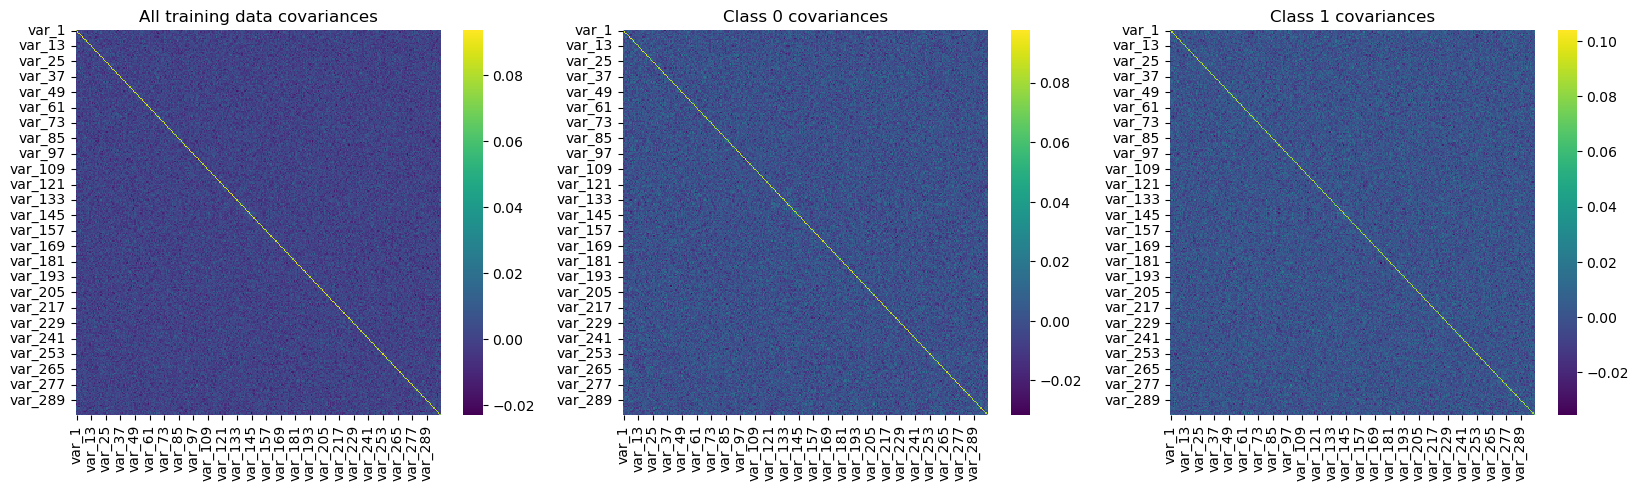

In [5]:
#Covariance Matricies
corr_df = TrainData[VarCols].copy()
df_0 = TrainData[TrainData['target_eval']==0][VarCols].copy()
df_1 = TrainData[TrainData['target_eval']==1][VarCols].copy()
corr_mat = corr_df.cov()
corr_mat0 = df_0.cov()
corr_mat1 = df_1.cov()
#Now plot
fig, ax = plt.subplots(1,3, figsize=(20,5))
ax0 = sns.heatmap(corr_mat, cmap='viridis', annot=False, ax=ax[0])
ax0.title.set_text('All training data covariances')

ax1 = sns.heatmap(corr_mat0, cmap='viridis', annot=False, ax=ax[1])
ax1.title.set_text('Class 0 covariances')

ax2 = sns.heatmap(corr_mat1, cmap='viridis', annot=False, ax=ax[2])
ax2.title.set_text('Class 1 covariances')
plt.show()

Ok additionally nothing appears obviously linked either but if we split it according to class we can begin to see an increase in correlation. Suggesting supervised dimension reduction is the way forward. But for completion's sake lets have a look at PCA  

## Unsupervised Dimension Reduction
### PCA

0.951838767740964

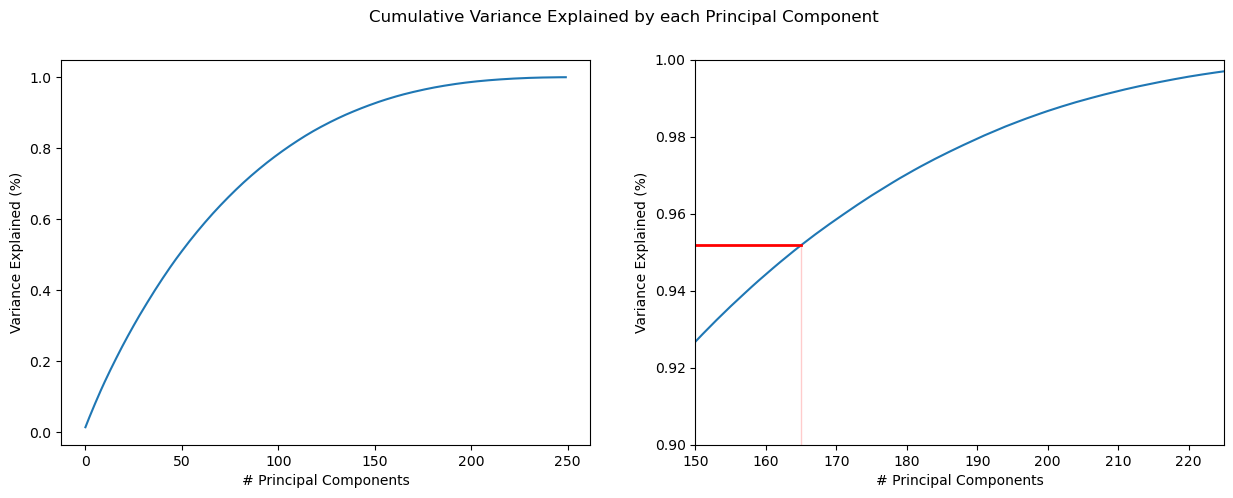

In [6]:
from sklearn.decomposition import PCA
#PCA
pca = PCA()
pca.fit(TrainData[VarCols])
Cumulative_evr = pca.explained_variance_ratio_.cumsum()

#Plots
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Cumulative Variance Explained by each Principal Component')
ax0 = sns.lineplot(x=range(pca.explained_variance_.shape[0]), y=Cumulative_evr, ax=ax[0])
ax0.set_xlabel('# Principal Components')
ax0.set_ylabel('Variance Explained (%)')

ax1 = sns.lineplot(x=range(pca.explained_variance_.shape[0]), y=Cumulative_evr, ax=ax[1])
ax1 = sns.lineplot(x=[165, 165], y=[0, Cumulative_evr[165]], linewidth=2, alpha=1, color='r', ax=ax[1])
ax1 = sns.lineplot(x=[0, 165], y=[Cumulative_evr[165], Cumulative_evr[165]], linewidth=2, alpha=1, color='r', ax=ax[1])

ax1.set_xlabel('# Principal Components')
ax1.set_ylabel('Variance Explained (%)')
ax1.set_xlim(150,225)
ax1.set_ylim(0.9,1)

display(Cumulative_evr[165])

To get 95% of the variance we'd have to use ~165 variables (more than half the original) that is not an acceptable solution

### t-SNE

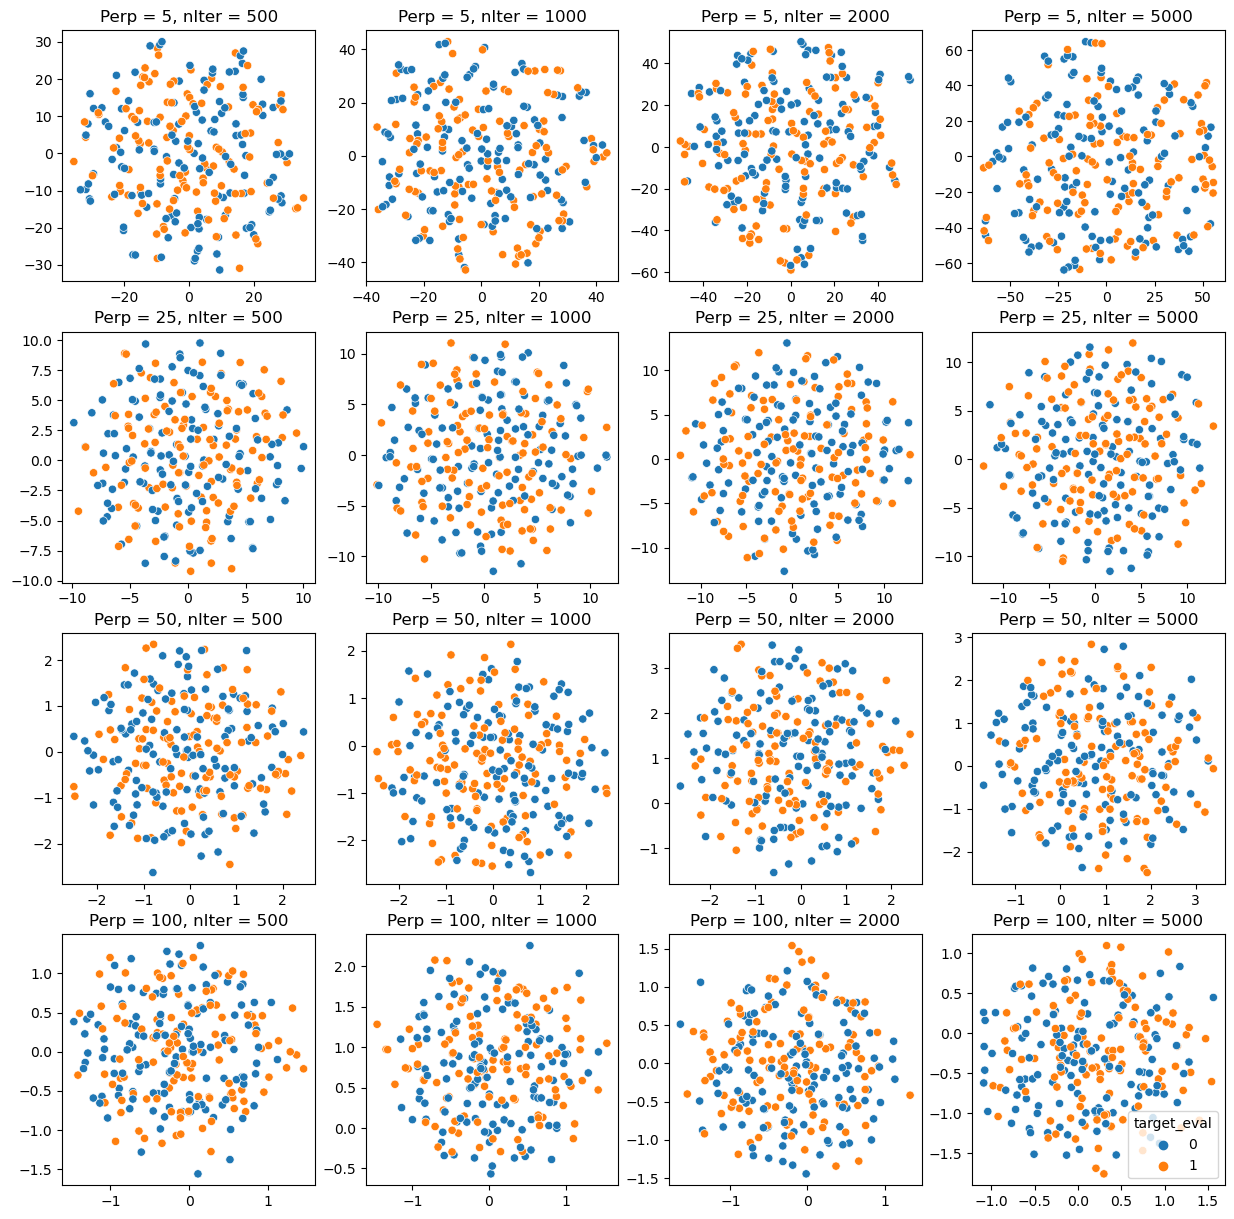

In [29]:
from sklearn.manifold import TSNE
Perplexities = [5,25,50,100]
nIters = [500,1000,2000,5000]

fig,ax = plt.subplots(len(Perplexities), len(nIters), figsize=(15,15))
for r in range(len(Perplexities)):
    p = Perplexities[r]
    for c in range(len(nIters)):
        i = nIters[c]
        tsne = TSNE(perplexity=p, n_iter=i)
        Y = tsne.fit_transform(TrainData[VarCols])
        #Plot
        if (r==len(Perplexities)-1) & (c==len(nIters)-1):
            t_ax = sns.scatterplot(x=Y[:,0], y=Y[:,1],  hue=TrainData['target_eval'], ax=ax[r,c], legend=True)
        else:
            t_ax = sns.scatterplot(x=Y[:,0], y=Y[:,1],  hue=TrainData['target_eval'], ax=ax[r,c], legend=False)
        tn = "Perp = " + str(p) + ", nIter = " + str(i)
        t_ax.title.set_text(tn)

### UMAP

(0.0, 6.0)

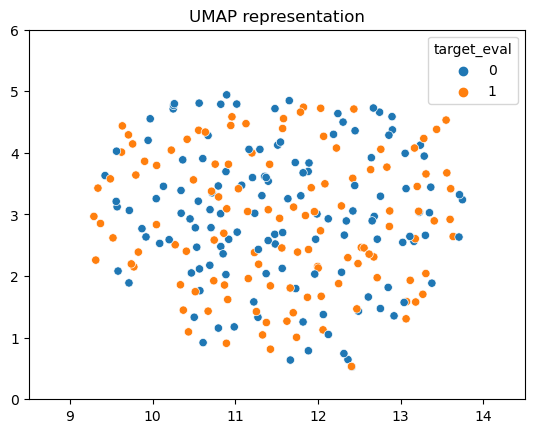

In [32]:
import umap
Y = umap.UMAP(random_state=42).fit_transform(TrainData[VarCols])
sns.scatterplot(x=Y[:,0], y=Y[:,1], hue=TrainData['target_eval'])
plt.title('UMAP representation')
plt.xlim(8.5,14.5)
plt.ylim(0,6)

So absolutely no separation if we try and force it into UMAP or tSNE

## Supervised Dimension Reduction
### PLS
Clearly we need the target to guide this regression. One option is partial least squares, where we used matrix multiplication to fit the data to the results. But this means that we regress the data points, so we can calculate the RMSE to measure how good each fit is to an untrained set

/Users/marcusleiwe/anaconda3/envs/AP_env/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:302: UserWarning: Y residual is constant at iteration 201
  warnings.warn(f"Y residual is constant at iteration {k}")


Text(0, 0.5, 'Percentage variance explained')

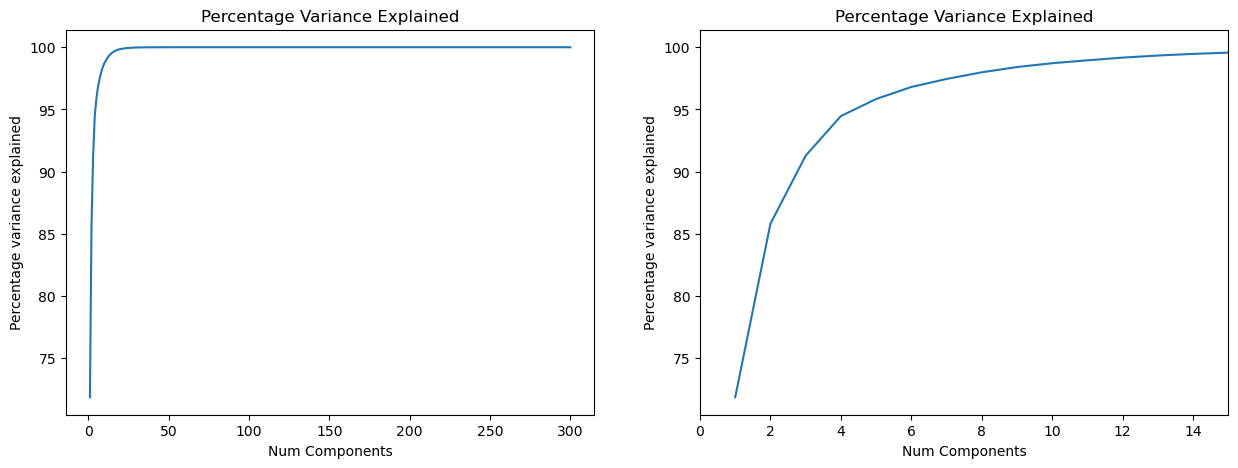

In [139]:
from sklearn import cross_decomposition
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score

X = TrainData[VarCols]
y = TrainData['target_eval']

# Fit PLS
n_comp = 300
pls = PLSRegression(n_components=n_comp)
pls.fit(X, y)

#Calculate variance explained per latent
r2 = np.zeros(pls.n_components)
X_trans = pls.transform(X)
for i in range(0, n_comp):
    y_pred = (np.dot(X_trans[:,i][:, np.newaxis],
                     pls.y_loadings_[:,i][:, np.newaxis].T)
              * pls._y_std + pls._y_mean)
    r2[i] = r2_score(y, y_pred)


y_pred = pls.predict(X)
overall_r2 = r2_score(y, y_pred)
cum_sum_r2 = np.cumsum(r2) * 100

#Now plot
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax0 = sns.lineplot(x=range(1,n_comp+1), y=cum_sum_r2, ax=ax[0])
ax0.title.set_text("Percentage Variance Explained")
ax0.set_xlabel("Num Components")
ax0.set_ylabel("Percentage variance explained")

ax1 = sns.lineplot(x=range(1,n_comp+1), y=cum_sum_r2, ax=ax[1])
ax1.title.set_text("Percentage Variance Explained")
ax1.set_xlim(0,15)
ax1.set_xlabel("Num Components")
ax1.set_ylabel("Percentage variance explained")


So from PLS most of the variance can be explained in the first 10 or so latents/components. Far better than the performance of PCA. 

But how many latents should we use? To test this we can use the RMSE and measure the difference between the test and predicitions, but we need to prevent over-fitting so we'll split with K-fold cross validation. And evaluate which number of latents/components performs best. (NB I'm going to limit it to 50 components because there's almost no variance after that)

Text(0, 0.5, 'RMSE')

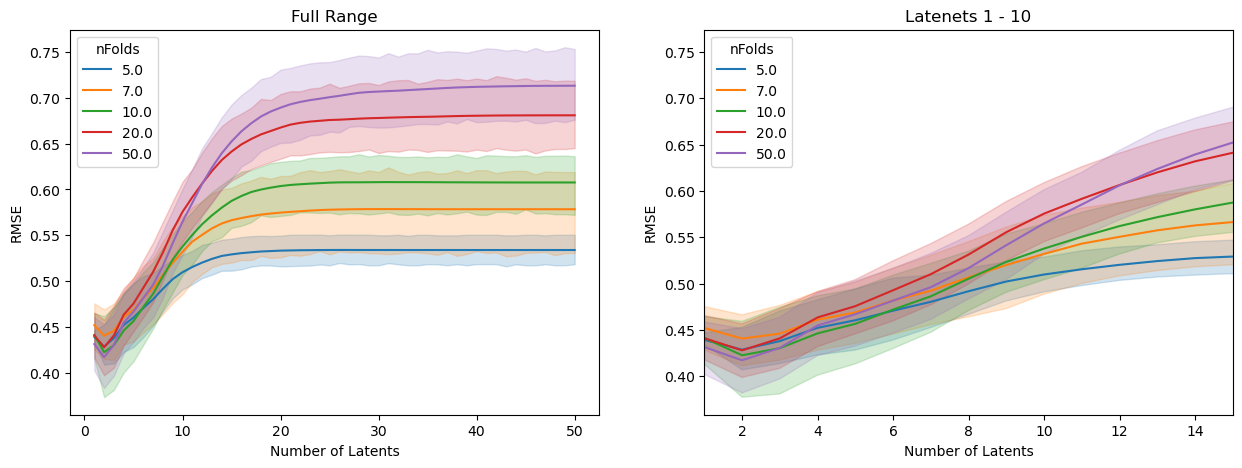

In [142]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Folds = [3,4,5,6,7,8,9,10]
Folds = [5,7,10,20,50]
n_comp = 50
Folds_df = pd.DataFrame(columns=['nFolds','nLatent','RMSE'])
for nFold in Folds:
    kf = KFold(n_splits=nFold)
    for train, test in kf.split(TrainData):
        X_train = TrainData.iloc[train][VarCols]
        y_train = TrainData.iloc[train]['target_eval']
        X_test = TrainData.iloc[test][VarCols]
        y_test = TrainData.iloc[test]['target_eval']
        
        nLatents = np.zeros(n_comp)
        RMSEval = np.zeros(n_comp)
        for l in range(n_comp):
            comp = l+1
            pls = PLSRegression(n_components = comp) #Set it to l components
            pls.fit(X_train, y_train)
            y_pred = pls.predict(X_test)
            RMSE = mean_squared_error(y_test, y_pred, squared=False)
            RMSEval[l] = RMSE
            nLatents[l] = comp
        
        d = {'nFolds':np.ones(n_comp)*nFold, 'nLatent':nLatents, 'RMSE': RMSEval}
        temp_df = pd.DataFrame(data = d)
        Folds_df = pd.concat([Folds_df,temp_df])
#Now figure
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax0 = sns.lineplot(data=Folds_df, x='nLatent', y='RMSE', hue='nFolds', palette="tab10", ax=ax[0])
ax0.title.set_text("Full Range")
ax0.set_xlabel('Number of Latents')
ax0.set_ylabel('RMSE')

ax1 = sns.lineplot(data=Folds_df, x='nLatent', y='RMSE', hue='nFolds', palette="tab10", ax=ax[1])
ax1.title.set_text("Latenets 1 - 10")
ax1.set_xlabel('Number of Latents')
ax1.set_xlim(1,15)
ax1.set_ylabel('RMSE')


Ok so from these RMSE values, we can actually reduce the number of dimensions (latents) to two! This means we can now make a simple 2D plot of this

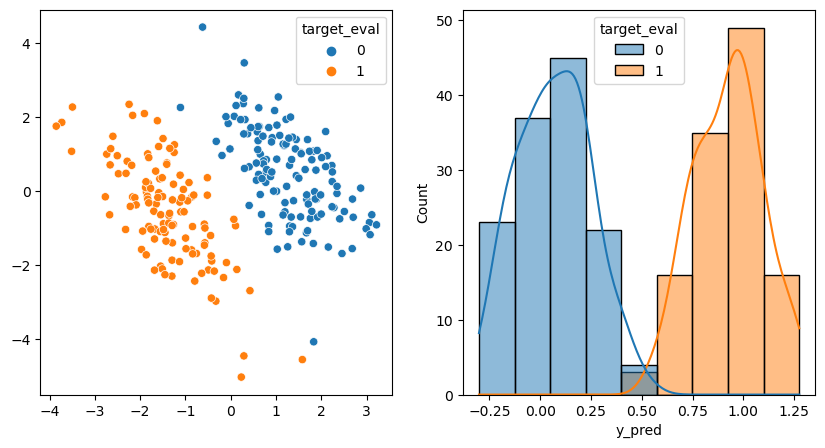

In [172]:
X = TrainData[VarCols]
X2 = TestData[VarCols]
y = TrainData['target_eval']
pls = PLSRegression(n_components=2)
Xt, yt = pls.fit_transform(X,y)
y_pred = pls.predict(X)
y_pred = y_pred.reshape(len(y_pred))

df = pd.DataFrame({'y_pred':y_pred, 'target_eval':TrainData['target_eval']})

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax0 = sns.scatterplot(x=Xt[:,0], y=Xt[:,1], hue=TrainData['target_eval'], ax=ax[0])
ax1 = sns.histplot(data=df, x='y_pred', hue='target_eval', kde=True, ax=ax[1])


Wow, this is nice. And there really looks like a clear distinction. But what about when we add the test data?

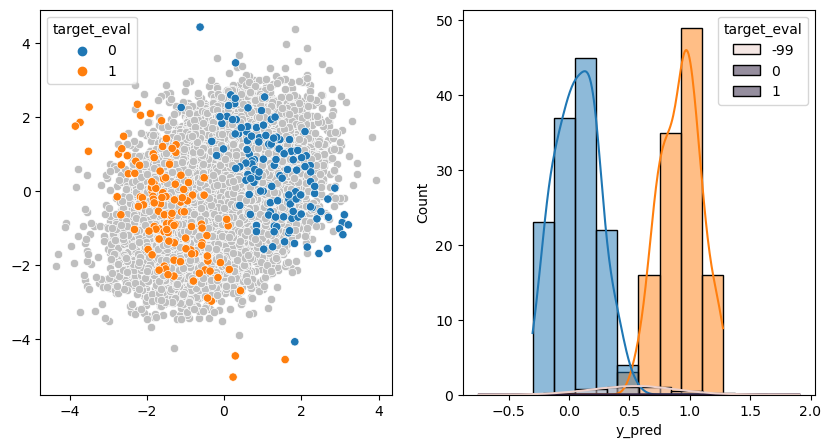

In [177]:
Xt2 = pls.transform(X2)
yt2 = pls.predict(X2)
y_pred = yt2.reshape(len(yt2))
df2 = pd.DataFrame({'y_pred':y_pred, 'target_eval':TestData['target_eval']})
df_final = pd.concat([df,df2])

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax0 = sns.scatterplot(x=Xt2[:,0], y=Xt2[:,1], color=[0.75,0.75,0.75], ax=ax[0])
ax0 = sns.scatterplot(x=Xt[:,0], y=Xt[:,1], hue=TrainData['target_eval'], ax=ax[0])

ax1 = sns.histplot(data=df, x='y_pred', hue='target_eval', kde=True, ax=ax[1])
ax1 = sns.histplot(data=df_final, x='y_pred', hue='target_eval', bins=10, stat="density", kde=True, ax=ax[1])

Hmm... this is a worrying sign. The actual test data isn't split very clearly as you can see the test data (target_eval = -99) doesn't have a clear separation. Let's try another method.
### Linear Discriminant analysis
This minimises the spread and distance between the two groups, sometimes known as Fischer's Discriminant Analysis

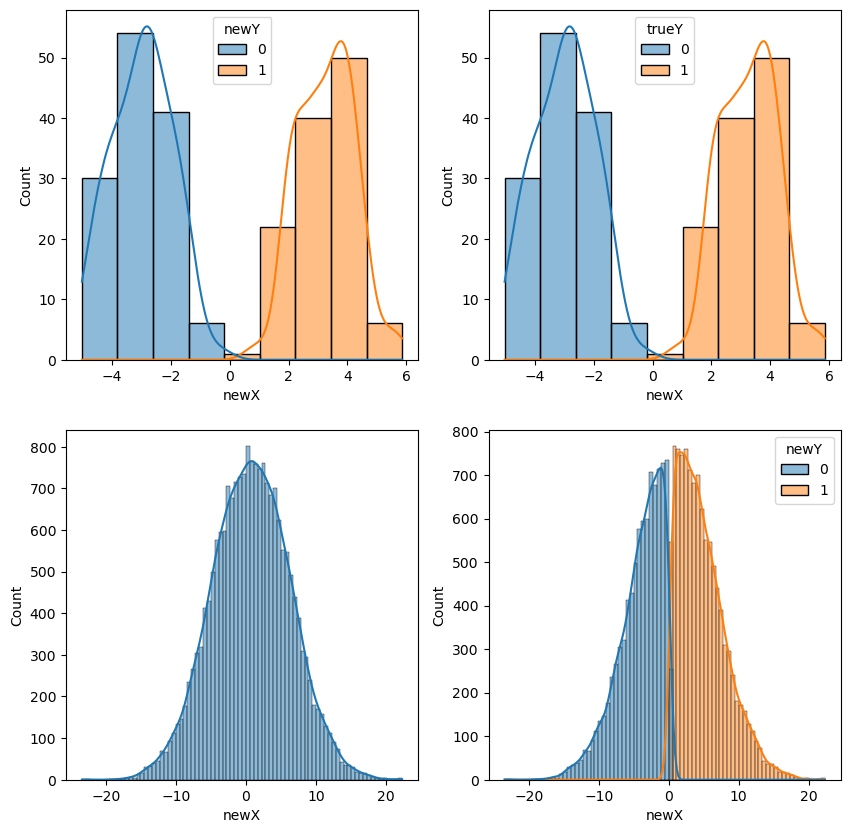

In [208]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = TrainData[VarCols]
y = TrainData['target_eval']

# Fit LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
new_y = lda.predict(X)

new_X = lda.transform(X)
new_X = new_X.reshape(len(new_X))
temp_df = pd.DataFrame({'newX':new_X, 'newY':new_y, 'trueY':y})

testX = lda.transform(TestData[VarCols])
testX = testX.reshape(len(testX))
predY = lda.predict(TestData[VarCols])
test_df = pd.DataFrame({'newX':testX,'newY':predY})

#Figure plot
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax0 = sns.histplot(data=temp_df, x='newX', hue='newY', kde=True, ax=ax[0,0])
ax1 = sns.histplot(data=temp_df, x='newX', hue='trueY', kde=True, ax=ax[0,1])

ax2 = sns.histplot(data=test_df, x='newX', kde=True, ax=ax[1,0])
ax3 = sns.histplot(data=test_df, x='newX', hue='newY', kde=True, ax=ax[1,1])

So while LDA works very nicely on the training data, the test data seems still to be grouped into a single class. This might be to do with the assumption that the distribution of the classes is normal when it clearly isn't. Before doing a train test split to calculate an ROC for comparison lets try some others that might work

### Quadratic Discriminant Analysis
Essentially the same but fitted to a quadratic equation

/Users/marcusleiwe/anaconda3/envs/AP_env/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


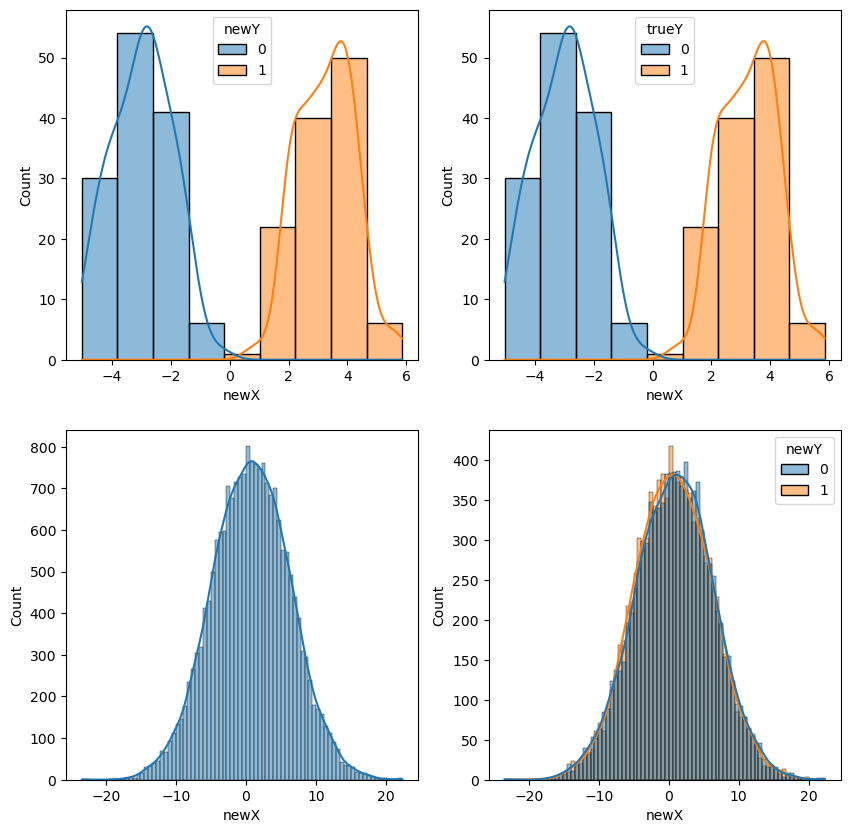

In [219]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
X = TrainData[VarCols]
y = TrainData['target_eval']

# Fit QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
new_y = qda.predict(X)

new_X = lda.transform(X)
new_X = new_X.reshape(len(new_X))
temp_df = pd.DataFrame({'newX':new_X, 'newY':new_y, 'trueY':y})

testX = lda.transform(TestData[VarCols])
testX = testX.reshape(len(testX))
predY = qda.predict(TestData[VarCols])
test_df = pd.DataFrame({'newX':testX,'newY':predY})

#Figure plot
fig, ax = plt.subplots(2,2, figsize=(10,10))

ax0 = sns.histplot(data=temp_df, x='newX', hue='newY', kde=True, ax=ax[0,0])
ax1 = sns.histplot(data=temp_df, x='newX', hue='trueY', kde=True, ax=ax[0,1])

ax2 = sns.histplot(data=test_df, x='newX', kde=True, ax=ax[1,0])
ax3 = sns.histplot(data=test_df, x='newX', hue='newY', kde=True, ax=ax[1,1])

Wow this is a lot worse seems that there really is a linear relationship that can be detected

In [223]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis, KNeighborsClassifier

nca = NeighborhoodComponentsAnalysis(random_state=42)

train_X = TrainData[VarCols]
train_y = TrainData['target_eval']
test_X = TestData[VarCols]

X_trans = nca.fit_transform(train_X, train_y)
print(len(nca.components_),len(nca.components_[0]))

#Calculat the variance explained
r2 = np.zeros(len(nca.components_))
for i in range(0, len(X_trans[0])):
    y_pred = (np.dot(X_trans[:,i][:, np.newaxis],
                    ))

# #Calculate variance explained per latent
# r2 = np.zeros(len(nca.components_))
# for i in range(0, len(newX[0])):
#     y_pred = (np.dot(X_trans[:,i][:, np.newaxis],
#                      pls.y_loadings_[:,i][:, np.newaxis].T)
#               * pls._y_std + pls._y_mean)
#     r2[i] = r2_score(y, y_pred)


# y_pred = pls.predict(X)
# overall_r2 = r2_score(y, y_pred)
# cum_sum_r2 = np.cumsum(r2) * 100

# #Now plot
# fig, ax = plt.subplots(1,2, figsize=(15,5))
# ax0 = sns.lineplot(x=range(1,n_comp+1), y=cum_sum_r2, ax=ax[0])
# ax0.title.set_text("Percentage Variance Explained")
# ax0.set_xlabel("Num Components")
# ax0.set_ylabel("Percentage variance explained")

# ax1 = sns.lineplot(x=range(1,n_comp+1), y=cum_sum_r2, ax=ax[1])
# ax1.title.set_text("Percentage Variance Explained")
# ax1.set_xlim(0,15)
# ax1.set_xlabel("Num Components")
# ax1.set_ylabel("Percentage variance explained")



# print("Components")
# print(nca.components_)

# print("Features in")
# print(nca.n_features_in_)

# print("Feature names")
# print(nca.feature_names_in_)

# print("n Iterations")
# print(nca.n_iter_)


300 300
